# MULTI CLASS CLASSIFICATION OF COLOUR IMAGES - CNN

We will use cifar10 dataset form tensorflow's inbuilt dataset. This is a set of colour images. Dataset consists of 60,000 images of 32*32*3 pixels each. 3 refers to the R,G,B colour channels. There are 10 output labels (from 0 to 9). We will build a model using CNN that will correctly classify the image. Since this is multi-class classification problem, we will use categorical cross entropy as loss function.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
#load cifar10 dataset
from tensorflow.keras.datasets import cifar10

In [4]:
#data is already organised. Now just give separate names to them
(x_train, y_train), (x_test,y_test) = cifar10.load_data()

In [5]:
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((50000, 32, 32, 3), (50000, 1), (10000, 32, 32, 3), (10000, 1))

In [6]:
#i will have 10 neurons in output layer and i label each output class
from tensorflow.keras.utils import to_categorical

In [7]:
y_train

array([[6],
       [9],
       [9],
       ...,
       [9],
       [1],
       [1]], dtype=uint8)

In [8]:
y_cat_train=to_categorical(y_train)
y_cat_test=to_categorical(y_test)

In [9]:
y_cat_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]])

In [10]:
x_train=x_train/255
x_test=x_test/255

In [11]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten

In [32]:
#build the model
model=Sequential()
model.add(Conv2D(filters=64, kernel_size=(4,4), strides=(1,1), padding='valid', input_shape=(32,32,3), activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Conv2D(filters=32, kernel_size=(4,4), strides=(1,1), padding='valid', input_shape=(32,32,3), activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(10, activation='softmax'))

C:\Users\yrupa\anaconda3\envs\py3124\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [33]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)                    │ (None, 29, 29, 64)          │           3,136 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 14, 14, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 11, 11, 32)          │          32,800 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 5, 5, 32)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 800)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 256)                 │         205,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 10)                  │           2,570 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 243,562 (951.41 KB)

 Trainable params: 243,562 (951.41 KB)

 Non-trainable params: 0 (0.00 B)

In [34]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [15]:
from tensorflow.keras.callbacks import EarlyStopping

In [16]:
early_stop=EarlyStopping(monitor='val_loss',mode=min,patience=10) 

C:\Users\yrupa\AppData\Local\Temp\ipykernel_18112\4205257600.py:1: UserWarning: EarlyStopping mode <built-in function min> is unknown, fallback to auto mode.
  early_stop=EarlyStopping(monitor='val_loss',mode=min,patience=10)


In [35]:
#train the model
model.fit(x_train, y_cat_train, epochs=15, validation_data=(x_test, y_cat_test), callbacks=[early_stop])

Epoch 1/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 35s 19ms/step - accuracy: 0.3531 - loss: 1.7538 - val_accuracy: 0.5235 - val_loss: 1.3257
Epoch 2/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 29s 18ms/step - accuracy: 0.5389 - loss: 1.3027 - val_accuracy: 0.5604 - val_loss: 1.2323
Epoch 3/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 28s 18ms/step - accuracy: 0.5828 - loss: 1.1826 - val_accuracy: 0.5909 - val_loss: 1.1680
Epoch 4/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 28s 18ms/step - accuracy: 0.6185 - loss: 1.0840 - val_accuracy: 0.6053 - val_loss: 1.1309
Epoch 5/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 29s 18ms/step - accuracy: 0.6470 - loss: 1.0057 - val_accuracy: 0.6309 - val_loss: 1.0656
Epoch 6/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 29s 18ms/step - accuracy: 0.6689 - loss: 0.9456 - val_accuracy: 0.6269 - val_loss: 1.0794
Epoch 7/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 30s 19ms/step - accuracy: 0.6912 - loss: 0.8781 - val_accuracy: 0.6527 - val_loss: 1.0076
Epoch 8/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 32s 20ms/step - accuracy: 0.7100 -

In [36]:
losses=pd.DataFrame(model.history.history)
losses

,accuracy,loss,val_accuracy,val_loss
0,0.43562,1.549938,0.5235,1.325675
1,0.54644,1.279323,0.5604,1.232292
2,0.58720,1.170691,0.5909,1.167966
3,0.62214,1.076378,0.6053,1.130917
4,0.64900,0.999280,0.6309,1.065562
5,0.66732,0.946070,0.6269,1.079356
6,0.68754,0.889386,0.6527,1.007609
7,0.70688,0.844254,0.6526,1.013508
8,0.72094,0.795107,0.6435,1.055338
9,0.73326,0.761532,0.6575,1.021179


<Axes: >

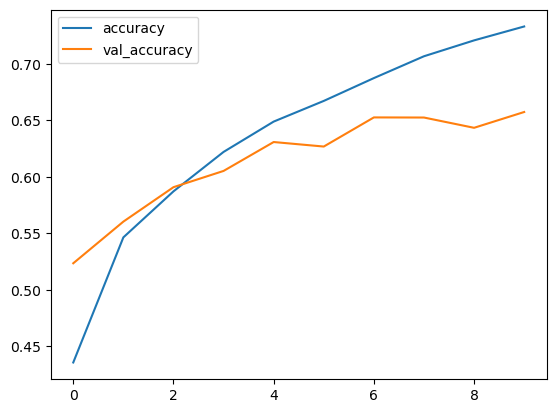

In [37]:
losses[['accuracy','val_accuracy']].plot()

<Axes: >

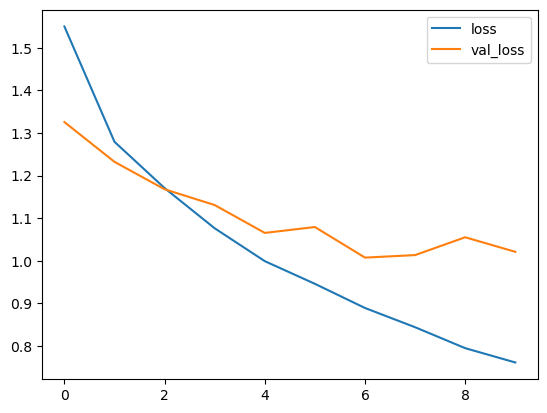

In [38]:
losses[['loss', 'val_loss']].plot()

In [21]:
from sklearn.metrics import confusion_matrix, classification_report

In [39]:
prediction=model.predict(x_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step


In [40]:
prediction

array([[1.6604620e-03, 5.5406517e-03, 9.3650341e-02, ..., 3.1371119e-03,
        1.3118349e-02, 2.7398931e-02],
       [9.1336621e-03, 3.2137003e-02, 1.2952810e-05, ..., 2.3138018e-08,
        9.5659596e-01, 2.1146960e-03],
       [1.3426071e-01, 7.3501460e-02, 2.3820173e-02, ..., 7.3355908e-04,
        6.7574996e-01, 4.5511987e-02],
       ...,
       [4.6846162e-05, 8.0115142e-06, 3.9350575e-01, ..., 1.5975252e-01,
        5.1850417e-05, 9.5517869e-05],
       [8.1658758e-02, 3.2904249e-01, 2.5756678e-02, ..., 1.3543481e-01,
        3.4762050e-03, 2.1341738e-04],
       [1.0733557e-08, 2.5772733e-08, 1.1556601e-05, ..., 9.9912757e-01,
        3.7377890e-10, 7.0123836e-09]], dtype=float32)

In [41]:
prediction.shape

(10000, 10)

In [51]:
#testing a random input
prediction[30].argmax()

6

In [52]:
y_test[30]

array([6], dtype=uint8)

In [44]:
print(classification_report(y_cat_test, prediction.round()))

              precision    recall  f1-score   support

           0       0.81      0.54      0.64      1000
           1       0.83      0.72      0.77      1000
           2       0.67      0.43      0.52      1000
           3       0.58      0.33      0.42      1000
           4       0.71      0.43      0.54      1000
           5       0.66      0.42      0.51      1000
           6       0.79      0.71      0.75      1000
           7       0.83      0.62      0.71      1000
           8       0.84      0.64      0.73      1000
           9       0.75      0.73      0.74      1000

   micro avg       0.75      0.56      0.64     10000
   macro avg       0.75      0.56      0.63     10000
weighted avg       0.75      0.56      0.63     10000
 samples avg       0.56      0.56      0.56     10000



C:\Users\yrupa\anaconda3\envs\py3124\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [45]:
preds=pd.DataFrame(prediction.round())

In [53]:
def x(pred):
    return pred.argmax()
x(preds.iloc[30])

6

In [54]:
pred=[]
for index in range(0,10000):
    a=x(preds.iloc[index])
    pred=np.append(pred,a)
pred

array([0., 8., 8., ..., 0., 0., 7.])

In [56]:
y_test[30]

array([6], dtype=uint8)

In [57]:
print(confusion_matrix(y_test, pred))

[[785  22  44  11  29   4   9   5  54  37]
 [123 720   6   2   2   3  12   0  22 110]
 [371   4 429  29  45  46  42  16   8  10]
 [419   7  31 325  32  92  48  20   7  19]
 [368   2  42  35 433  19  46  41   9   5]
 [376   2  31  84  22 417  23  37   2   6]
 [198   6  25  31   8  12 711   4   1   4]
 [248   1  17  25  38  30   7 619   1  14]
 [250  35   9   8   5   6   2   1 643  41]
 [151  69  10   8   0   5   3   3  17 734]]


## SUMMARY
1. Average is 0.64 which is not a very good value.
2.Loss function is 0.76 which is high.
3. By implementing EarlyStopping callback function, we were able to stop the training at 10th epoch itself.
4. We have added 2 convolutional layers here to process the colour images as they have many data points compared to grey scale images.
5. By manually picking up and testing a sample input (x_test[30]), we were able to see prediction[30] was same as y_test[30]
5. When y_test and pred (after converting them to same formats and as arrays) were fed into confusion matrix, the results were moderate.
6. Thus our model needs to be improved. We can work on the number of layers, number of neurons in each layer, number of epochs etc. 